In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset ที่ใช้คือ Suicide Rates Overview 1985 to 2016 จาก website kaggle


In [4]:
df = pd.read_csv('Suiciderate.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country             4999 non-null   object
 1   year                4999 non-null   object
 2   sex                 4999 non-null   object
 3   age                 4999 non-null   object
 4   suicides_no         4999 non-null   object
 5   population          4999 non-null   object
 6   suicides/100k pop   4999 non-null   object
 7   country-year        4999 non-null   object
 8   HDI for year        1281 non-null   object
 9    gdp_for_year ($)   4999 non-null   object
 10  gdp_per_capita ($)  4999 non-null   object
 11  generation          4999 non-null   object
dtypes: object(12)
memory usage: 468.8+ KB


In [6]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
4994,Canada,1991,female,25-34 years,177,2446400,7.24,Canada1991,NaN,"610,328,183,643",24038,Boomers
4995,Canada,1991,female,55-74 years,154,2263200,6.8,Canada1991,NaN,"610,328,183,643",24038,Silent
4996,Canada,1991,female,15-24 years,76,1886900,4.03,Canada1991,NaN,"610,328,183,643",24038,Generation X
4997,Canada,1991,female,75+ years,31,795900,3.89,Canada1991,NaN,"610,328,183,643",24038,G.I. Generation


### 1.การหาจำนวนคนที่ฆ่าตัวตายโดยคำนึงจากค่า GDP ต่อหัว และดูแยกเป็นเพศชายและเพศหญิง จะพบว่ายิ่ง GDP ต้ำจะมีการฆ่าตัวตายมาขึ้น และเพศชายมีการฆ่าตัวตายมากกว่าเพศหญิงในช่วง GDP ที่ต่ำกว่า

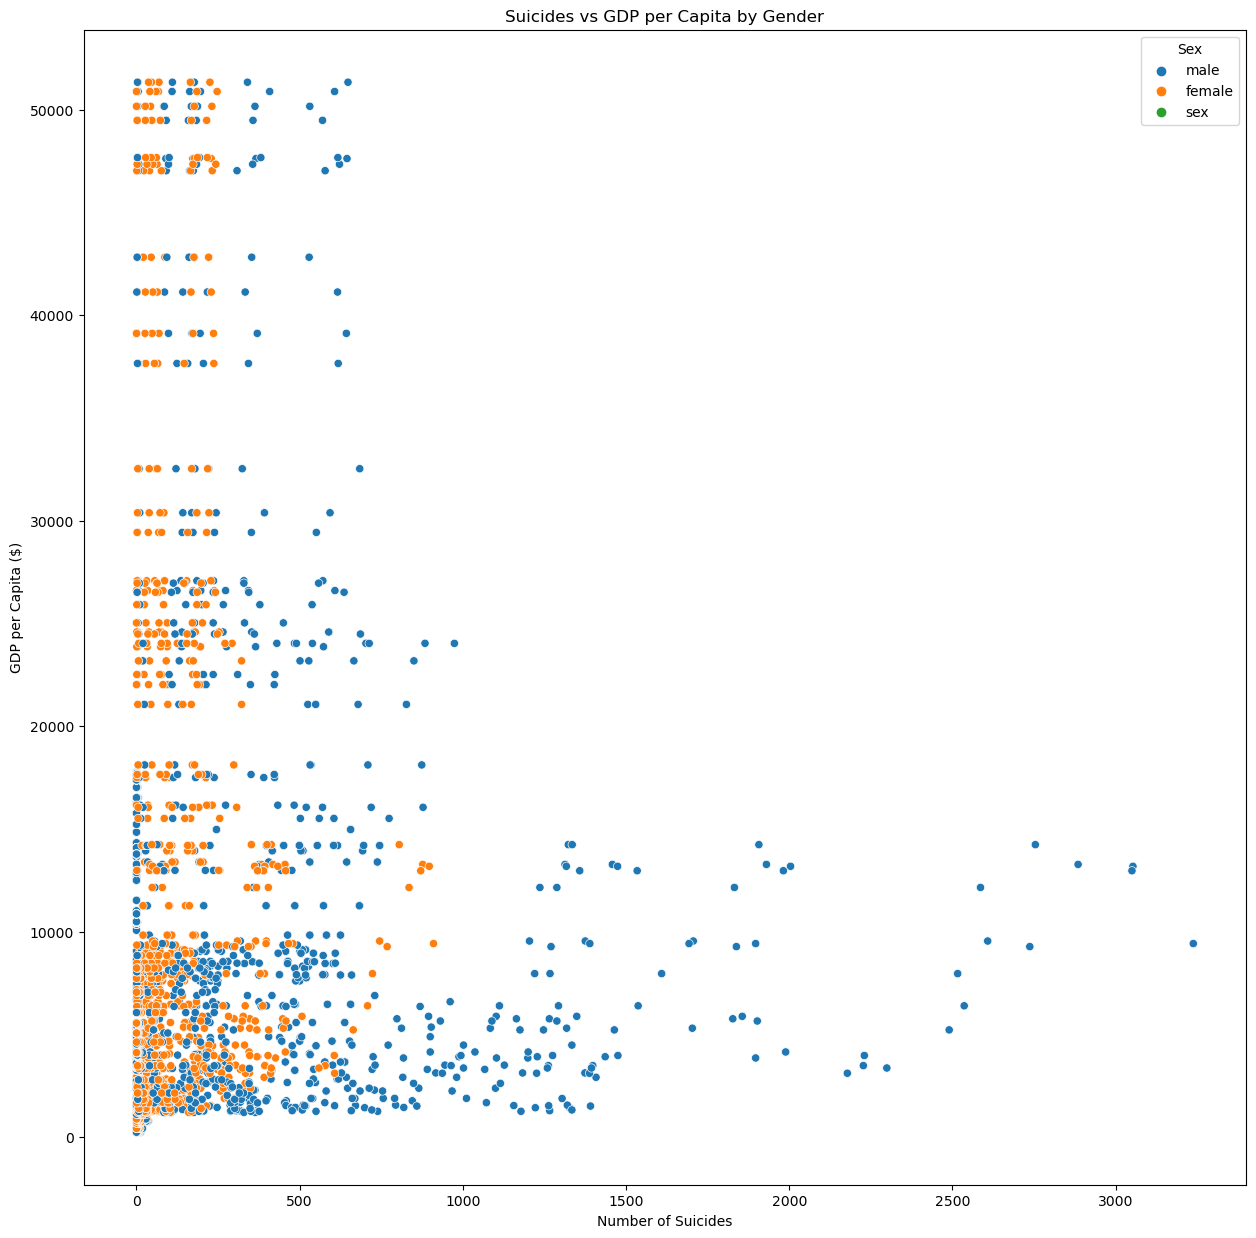

In [14]:
df['suicides_no'] = pd.to_numeric(df['suicides_no'], errors='coerce')
df['gdp_per_capita ($)'] = pd.to_numeric(df['gdp_per_capita ($)'], errors='coerce')

plt.figure(figsize=[15, 15])
sns.scatterplot(data=df, x='suicides_no', y='gdp_per_capita ($)', hue='sex')

plt.xlabel('Number of Suicides')
plt.ylabel('GDP per Capita ($)')
plt.title('Suicides vs GDP per Capita by Gender')

plt.legend(title='Sex')

plt.show()

### 2.กราฟการฆ่าตัวตายต่อหนึ่งแสนคนที่มีความสัมพันธ์กับค่า GDP ต่อหัวโดยใช้ Linear Model Regression นำการทำนายโดยการคำนึงถึงประเทศ ปี GDP ต่อหัว และการฆ่าตัวตายที่ความสัมพันธ์กัน โดยพบว่ายิ่ง GDP น้อยจะมีการฆ่าตัวตายที่มากขั้น โดยเพิ่มขึ้นทุกๆปี

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

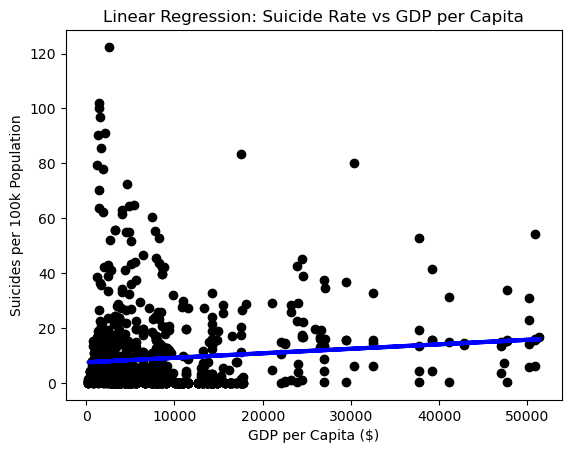

In [38]:

df['suicides/100k pop'] = pd.to_numeric(df['suicides/100k pop'], errors='coerce')

df['gdp_per_capita ($)'] = df['gdp_per_capita ($)'].astype(str).str.replace(',', '')

df['gdp_per_capita ($)'] = pd.to_numeric(df['gdp_per_capita ($)'], errors='coerce')

df.dropna(subset=['suicides/100k pop', 'gdp_per_capita ($)'], inplace=True)

X = df[['gdp_per_capita ($)']]
y = df['suicides/100k pop']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('GDP per Capita ($)')
plt.ylabel('Suicides per 100k Population')
plt.title('Linear Regression: Suicide Rate vs GDP per Capita')
plt.show()